# Cloudy models of NGC 346 bow shock around Walborn 3

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cmasher as cmr
import astropy.units as u
import sys
sys.path.append("../lib")
from cloudytab import cloudytab

In [113]:
sns.set_context("talk")
sns.set_color_codes()

In [54]:
m1 = cloudytab.CloudyModel("../cloudy/models/w3-n010")
m2 = cloudytab.CloudyModel("../cloudy/models/w3-n010-p")
m3 = cloudytab.CloudyModel("../cloudy/models/w3-n030-p")

In [55]:
m1.data.keys()

dict_keys(['Si', 'C', 'gdrift', 'ovr', 'Ne', 'Ar', 'gpot', 'gcont', 'phys', 'Cl', 'lina', 'gcharge', 'S', 'gabun', 'emis', 'O', 'N', 'cont', 'pre', 'gtemp', 'rad', 'lya'])

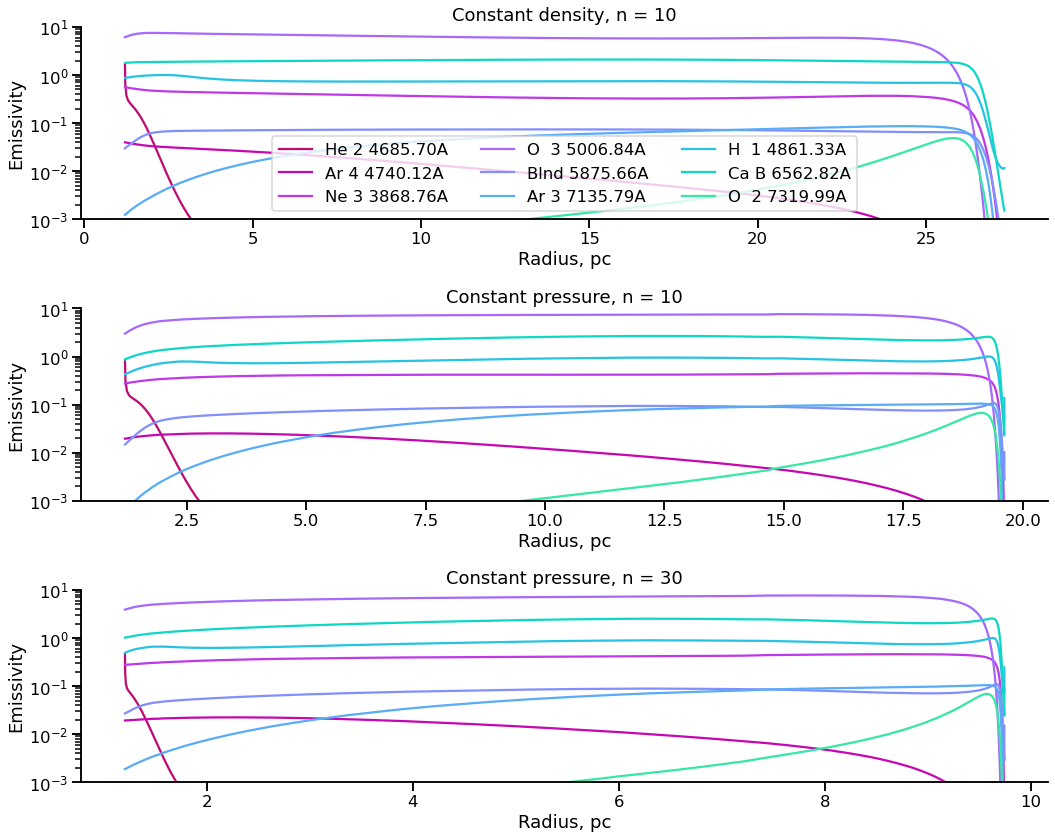

In [116]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m1, m2, m3], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
sns.despine()
fig.tight_layout();

In [40]:
class C:
    def __init__(self, d):
        for k, v in d.items():
            setattr(self, k, v.to_pandas())

In [59]:
m1.p = C(m1.data)
m2.p = C(m2.data)
m3.p = C(m3.data)

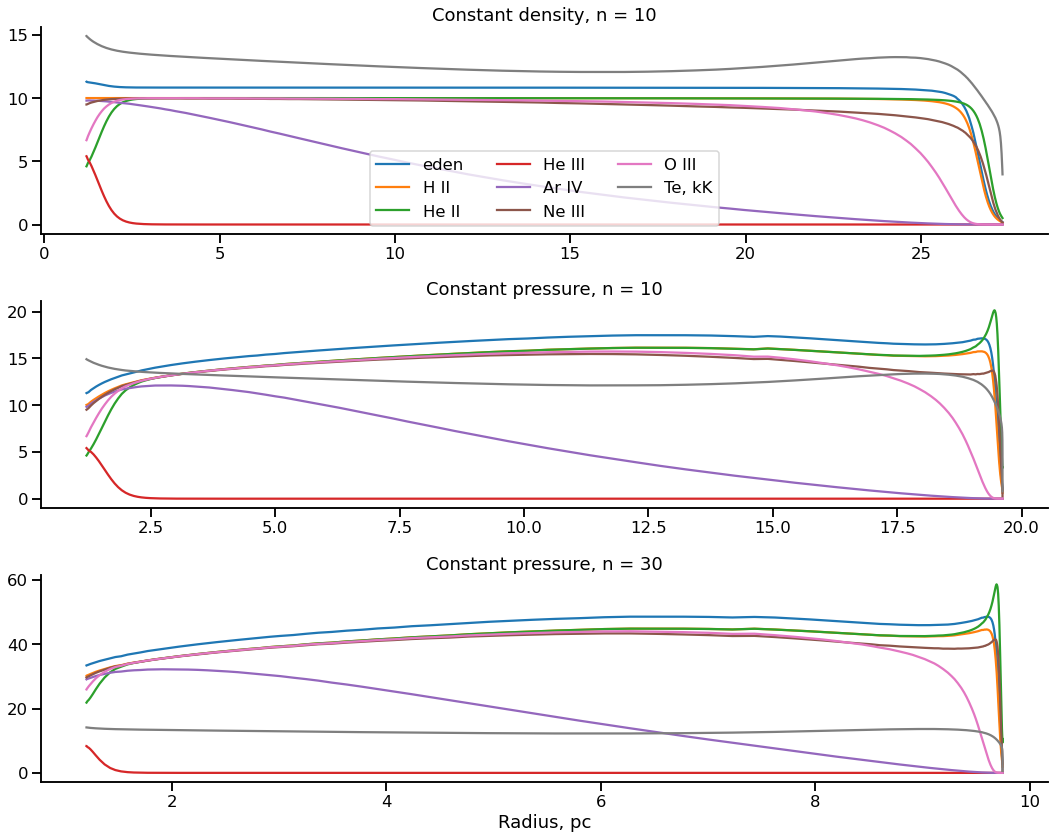

In [120]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
for m, ax in zip([m1, m2, m3], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
axes[-1].set(
    xlabel="Radius, pc",
)
sns.despine()
fig.tight_layout();

In [76]:
m.p.Ar

,depth,Ar,Ar+,Ar+2,Ar+3,Ar+4,Ar+5,Ar+6,Ar+7,Ar+8,Ar+9,Ar+10,Ar+11,Ar+12,Ar+13,Ar+14,Ar+15,Ar+16,Ar+17,Ar+18
0,1.249120e+15,1.680000e-13,2.200000e-07,0.01170,0.980,0.00788,0.000017,2.100000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.494690e+15,1.690000e-13,2.210000e-07,0.01180,0.980,0.00784,0.000017,2.100000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.247700e+16,1.760000e-13,2.270000e-07,0.01190,0.980,0.00764,0.000017,2.060000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.278190e+17,2.040000e-13,2.500000e-07,0.01250,0.981,0.00694,0.000016,1.940000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.815460e+17,2.580000e-13,2.920000e-07,0.01350,0.981,0.00599,0.000014,1.760000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,8.059020e+19,9.380000e-01,5.910000e-02,0.00283,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,8.059640e+19,9.390000e-01,5.860000e-02,0.00276,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,8.060230e+19,9.390000e-01,5.800000e-02,0.00269,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,8.060770e+19,9.400000e-01,5.750000e-02,0.00262,0.000,0.00000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
m.p.cont

,Cont nu,incident,trans,DiffOut,net trans,reflc,total,reflin,outlin,lineID,cont,nLine
0,3.044730e-09,1.203000e+27,1.228000e+02,2.482000e+29,2.482000e+29,2.791000e+27,2.510000e+29,0.0,0.0,NaN,NaN,0.0
1,3.054900e-09,1.206000e+27,1.827000e+02,2.508000e+29,2.508000e+29,2.825000e+27,2.536000e+29,0.0,0.0,NaN,NaN,0.0
2,3.065100e-09,1.209000e+27,2.710000e+02,2.534000e+29,2.534000e+29,2.860000e+27,2.563000e+29,0.0,0.0,NaN,NaN,0.0
3,3.075330e-09,1.212000e+27,4.009000e+02,2.561000e+29,2.561000e+29,2.895000e+27,2.589000e+29,0.0,0.0,NaN,NaN,0.0
4,3.085600e-09,1.216000e+27,5.916000e+02,2.587000e+29,2.587000e+29,2.931000e+27,2.616000e+29,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8223,6.235130e+06,3.729000e+27,3.729000e+27,0.000000e+00,3.729000e+27,4.997000e+22,3.729000e+27,0.0,0.0,NaN,NaN,0.0
8224,6.424540e+06,3.619000e+27,3.619000e+27,0.000000e+00,3.619000e+27,4.726000e+22,3.619000e+27,0.0,0.0,NaN,NaN,0.0
8225,6.619710e+06,3.512000e+27,3.512000e+27,0.000000e+00,3.512000e+27,4.469000e+22,3.512000e+27,0.0,0.0,NaN,NaN,0.0
8226,6.820810e+06,3.409000e+27,3.409000e+27,0.000000e+00,3.409000e+27,4.226000e+22,3.409000e+27,0.0,0.0,NaN,NaN,0.0


In [98]:
import astropy.constants as const

In [140]:
wavnorm = (const.h * const.c / u.rydberg).to(u.micron)
freqnorm = (u.rydberg / const.h).to(u.Hz)
sednorm = (u.erg / u.s) / const.L_sun.cgs
#m.p.cont["Cont  nu"] * wavnorm 
wavs = wavnorm / m1.data["cont"]["Cont  nu"]
freqs = freqnorm * m1.data["cont"]["Cont  nu"]
sednorm

<Quantity 2.6123302e-34>

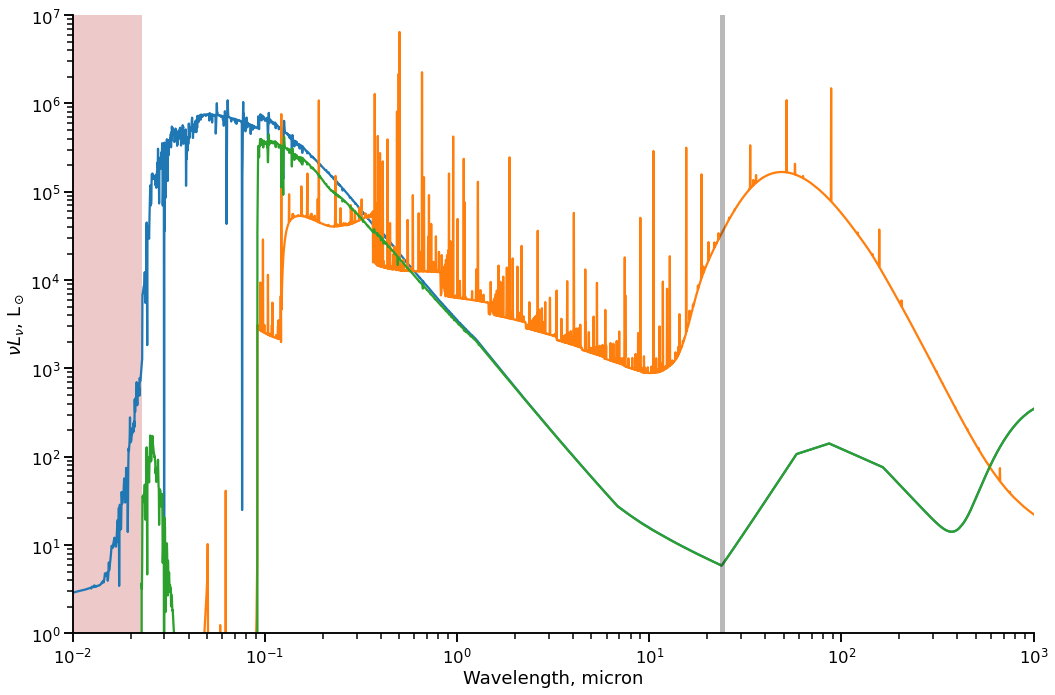

In [142]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(wavs, sednorm * m3.data["cont"]["incident"])
ax.plot(wavs, sednorm * m3.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m3.data["cont"]["trans"])

ax.axvline(24.0, lw=5, color="k", alpha=0.3)
ax.axvspan(0, 0.0912/4, lw=0, color="r", alpha=0.3)
ax.set(
    xscale="log",
    yscale="log",
    xlim=[1e-2, 1e3],
    ylim=[1.0, 1e7],
    xlabel="Wavelength, micron",
    ylabel=r"$\nu L_\nu$, L$_\odot$",
)
sns.despine()
fig.tight_layout();

In [160]:
m4 = cloudytab.CloudyModel("../cloudy/models/w3-n010-p-r08")
m5 = cloudytab.CloudyModel("../cloudy/models/w3-n005-p-r08")
m6 = cloudytab.CloudyModel("../cloudy/models/w3-n100-p-r08")
m7 = cloudytab.CloudyModel("../cloudy/models/w3-n050-p-r08")
m8 = cloudytab.CloudyModel("../cloudy/models/w3-n010-d01-r08")

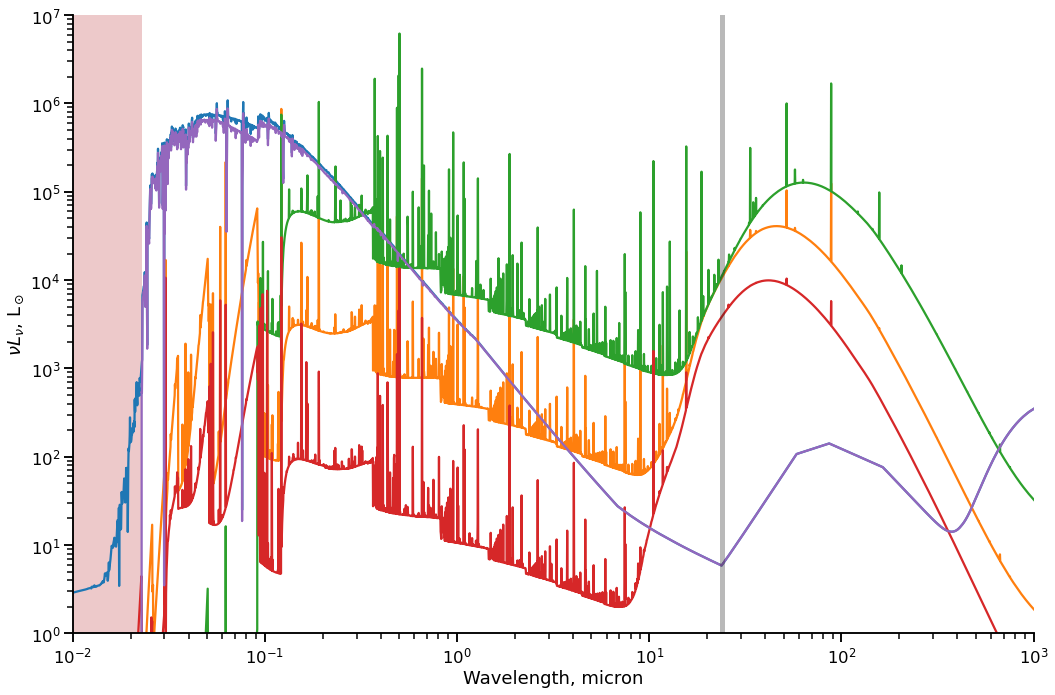

In [161]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(wavs, sednorm * m4.data["cont"]["incident"])
ax.plot(wavs, sednorm * m4.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m1.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m8.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m4.data["cont"]["trans"])

ax.axvline(24.0, lw=5, color="k", alpha=0.3)
ax.axvspan(0, 0.0912/4, lw=0, color="r", alpha=0.3)
ax.set(
    xscale="log",
    yscale="log",
    xlim=[1e-2, 1e3],
    ylim=[1.0, 1.0e7],
    xlabel="Wavelength, micron",
    ylabel=r"$\nu L_\nu$, L$_\odot$",
)
sns.despine()
fig.tight_layout();

In [162]:
for m in m4, m5, m6, m7, m8:
    m.p = C(m.data)

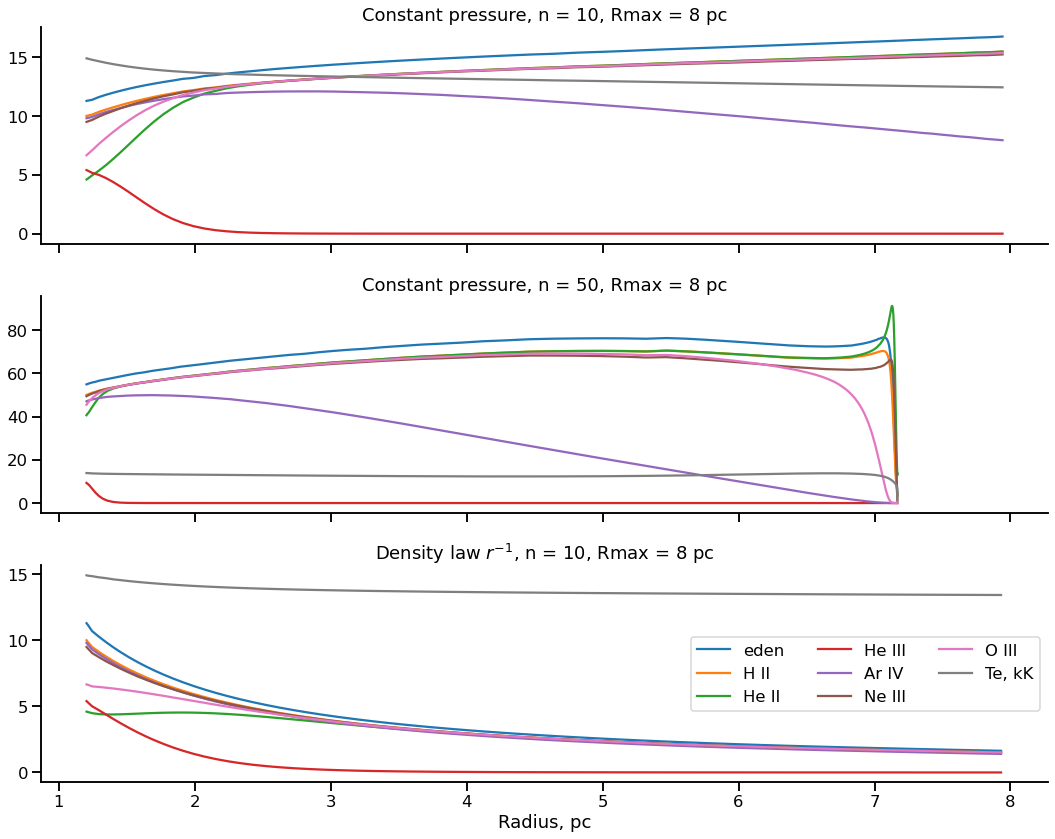

In [166]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
for m, ax in zip([m4, m7, m8], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[-1].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
axes[-1].set(
    xlabel="Radius, pc",
)
sns.despine()
fig.tight_layout();

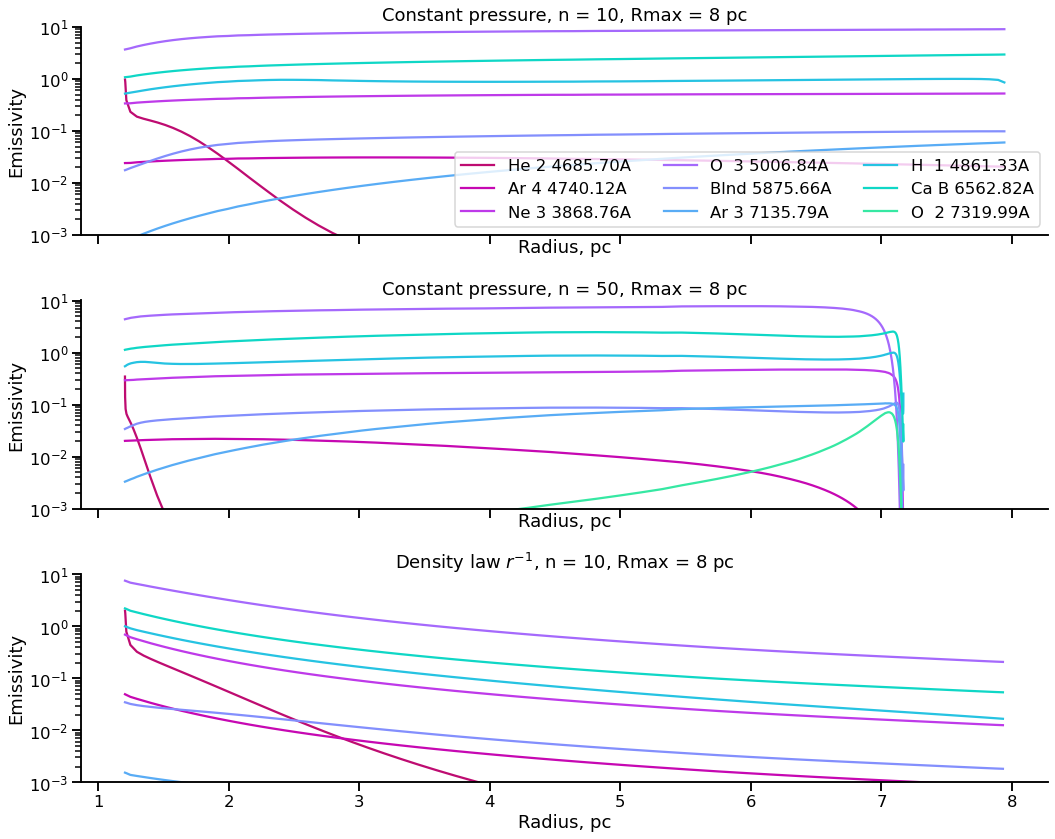

In [167]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

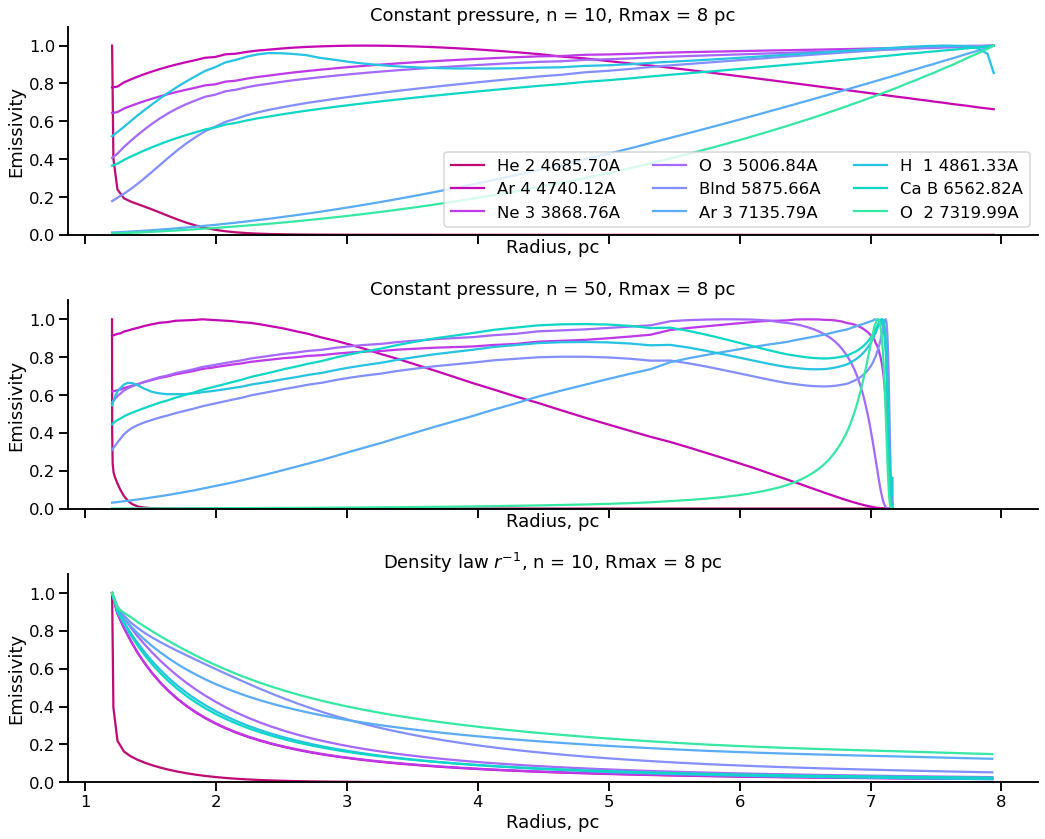

In [168]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / em.max(), label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, 1.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

## Brightness versus projected radius in spherical symmetry

First approximation to bow shock shape is that it is a hemisphere

Therefore at each projected radius $b$, the brightness is given by:
$$
S(b) = \int_{-\infty}^\infty j(r) \, dz
$$
where
$$
r^2 = b^2 + z^2 
\quad \Rightarrow \quad
2 r\, dr = 2 z\, dz
\quad \Rightarrow \quad
dz = \frac{r}{z}\, dr
$$
Therefore
$$
S(b) = 2 \int_b^\infty j(r) \, \frac{r}{(r^2 - b^2)^{1/2}} \, dr
$$

In [228]:
nb = 200
def brightness(r, dr, e, nb):
    b = np.linspace(0.0, r.max(), nb)
    _r = np.linspace(0.0, r.max(), 3 * nb + 5)
    _e = np.interp(_r, r, e, left=0.0, right=0.0)
    nr = len(_r)
    _dr = [r.max() / nr] * nr
    bgrid = np.stack([b] * nr, axis=0)
    rgrid = np.stack([_r] * nb, axis=1)
    egrid = np.stack([_e] * nb, axis=1)
    drgrid = np.stack([_dr] * nb, axis=1)
    rgrid[rgrid <= bgrid] = np.nan
    sb = 2 * np.nansum(egrid * rgrid * drgrid / (drgrid + np.sqrt(rgrid**2 - bgrid**2)), axis=0)
    return b, sb

In [229]:
m = m8
r = m.data["rad"]["radius"]
dr = m.data["rad"]["dr"]
e = m.data["emis"]["He 2 4685.70A"]
b, s = brightness(r, dr, e, nb)
s

array([1.40043581e-05, 1.40095572e-05, 1.40251936e-05, 1.40513867e-05,
       1.40883380e-05, 1.41363363e-05, 1.41957643e-05, 1.42671082e-05,
       1.43509703e-05, 1.44480845e-05, 1.45593378e-05, 1.46857966e-05,
       1.48287416e-05, 1.49897120e-05, 1.51705647e-05, 1.53735519e-05,
       1.56014259e-05, 1.58575820e-05, 1.61462584e-05, 1.64728216e-05,
       1.68441839e-05, 1.72694374e-05, 1.77608492e-05, 1.83355009e-05,
       1.90181480e-05, 1.98465789e-05, 2.08826742e-05, 2.22384783e-05,
       2.41513146e-05, 2.72909989e-05, 3.60077887e-05, 2.43431569e-05,
       2.16230547e-05, 1.97077542e-05, 1.81093811e-05, 1.66894966e-05,
       1.54071617e-05, 1.42359036e-05, 1.31546180e-05, 1.21581430e-05,
       1.12409546e-05, 1.03890324e-05, 9.60624037e-06, 8.88263183e-06,
       8.21286594e-06, 7.59996497e-06, 7.03105994e-06, 6.51398521e-06,
       6.03468630e-06, 5.60337734e-06, 5.20546765e-06, 4.85242831e-06,
       4.53162274e-06, 4.25983038e-06, 4.02965048e-06, 3.88204949e-06,
      

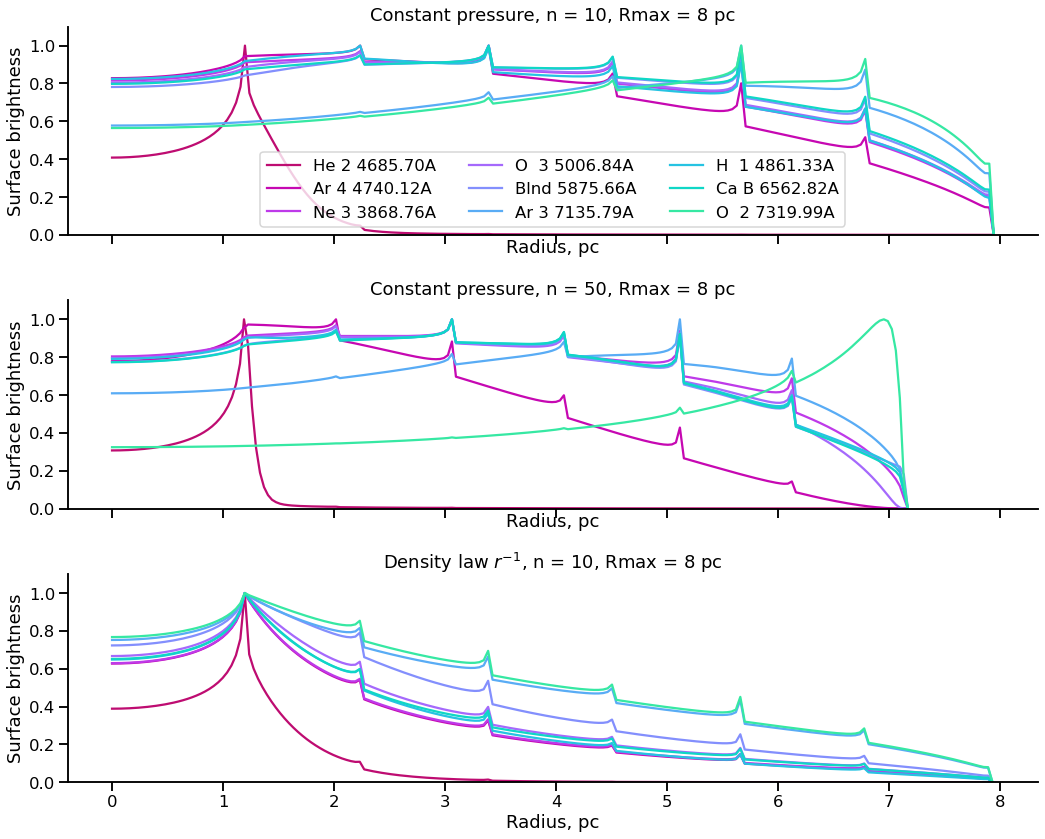

In [230]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    r = m.data["rad"]["radius"]
    dr = m.data["rad"]["dr"]
    nb = 200
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband]
        b, sb = brightness(r, dr, em, nb)
        radius = b * u.cm.to(u.pc) 
        ax.plot(radius, sb / sb.max(), label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, 1.1],
        xlabel="Radius, pc",
        ylabel="Surface brightness",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();